In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [8]:
# 1. Load the Titanic dataset
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Print Information about the DataFrame
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
 # 2. Data Cleaning & Preprocessing

# Drop irrelevant columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing values: fill Age with median and Embarked with mode
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Convert categorical variables into dummy variables
# drop_first=True avoids the dummy variable trap
data = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)
print(data.head())


   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


<ipython-input-10-760862cd2cc2>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
<ipython-input-10-760862cd2cc2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [11]:
# 3. Select Relevant Variables & Define X (features) and y (target)

X = data.drop('Survived', axis=1)  # All features except target
y = data['Survived']               # Target variable

In [12]:
# 4. Split the data into training, development, and test sets
# First, set aside 20% as the test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Then, split the remaining 80% into training (60% overall) and development (20% overall)
X_train, X_dev, y_train, y_dev = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print("Training set shape:", X_train.shape)
print("Development set shape:", X_dev.shape)
print("Test set shape:", X_test.shape)


Training set shape: (534, 8)
Development set shape: (178, 8)
Test set shape: (179, 8)


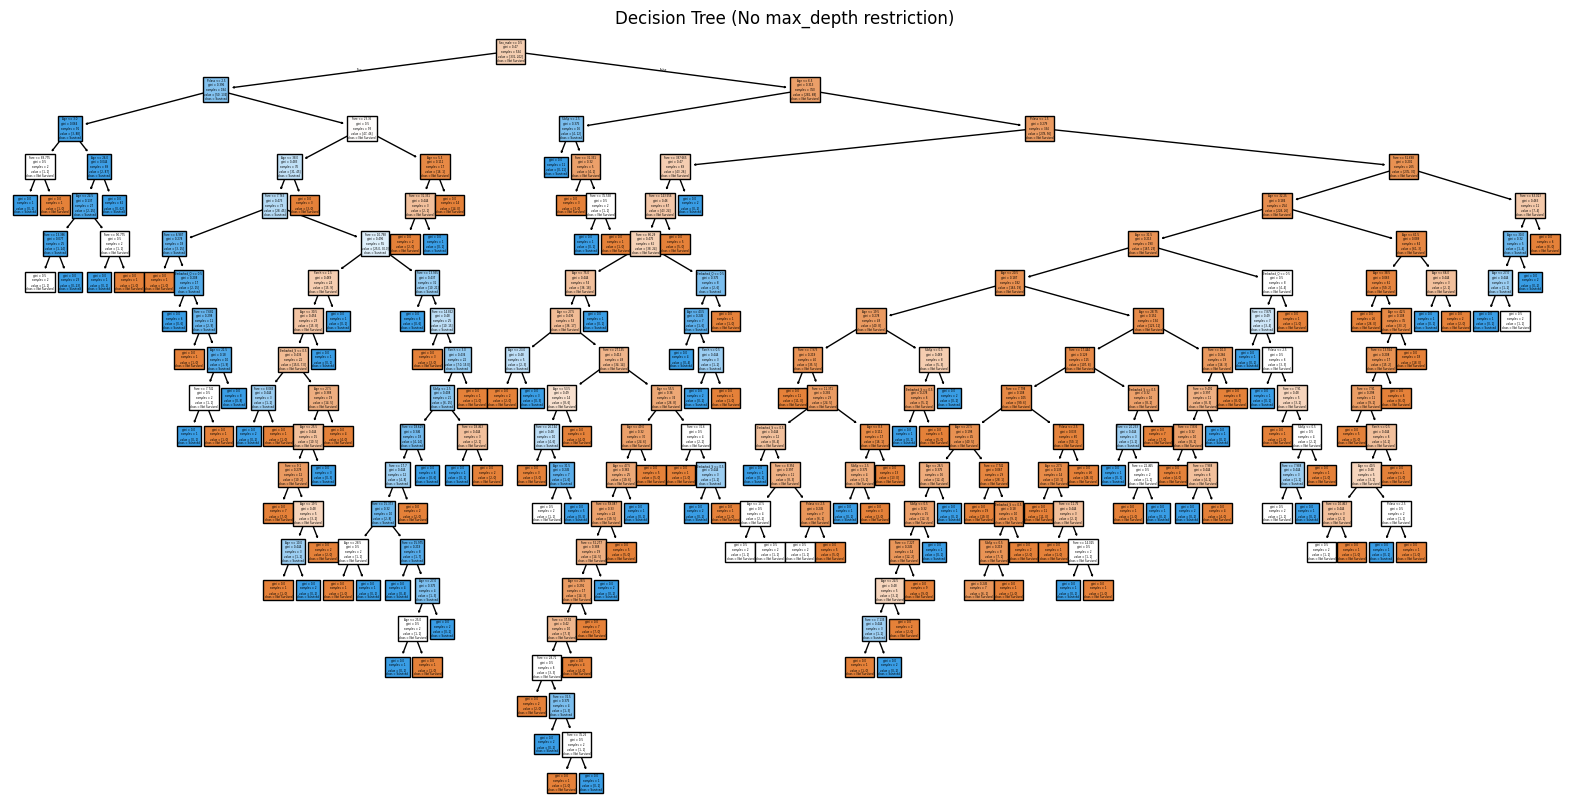

In [13]:
# 5. Build & Train a Decision Tree Classifier without depth restrictions

clf = DecisionTreeClassifier(random_state=42)  # max_depth=None by default (unrestricted)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree (No max_depth restriction)")
plt.show()

In [14]:
# Compute and report accuracy on the development set
dev_accuracy = clf.score(X_dev, y_dev)
print("Development Accuracy (no max_depth restriction):", dev_accuracy)

Development Accuracy (no max_depth restriction): 0.8033707865168539


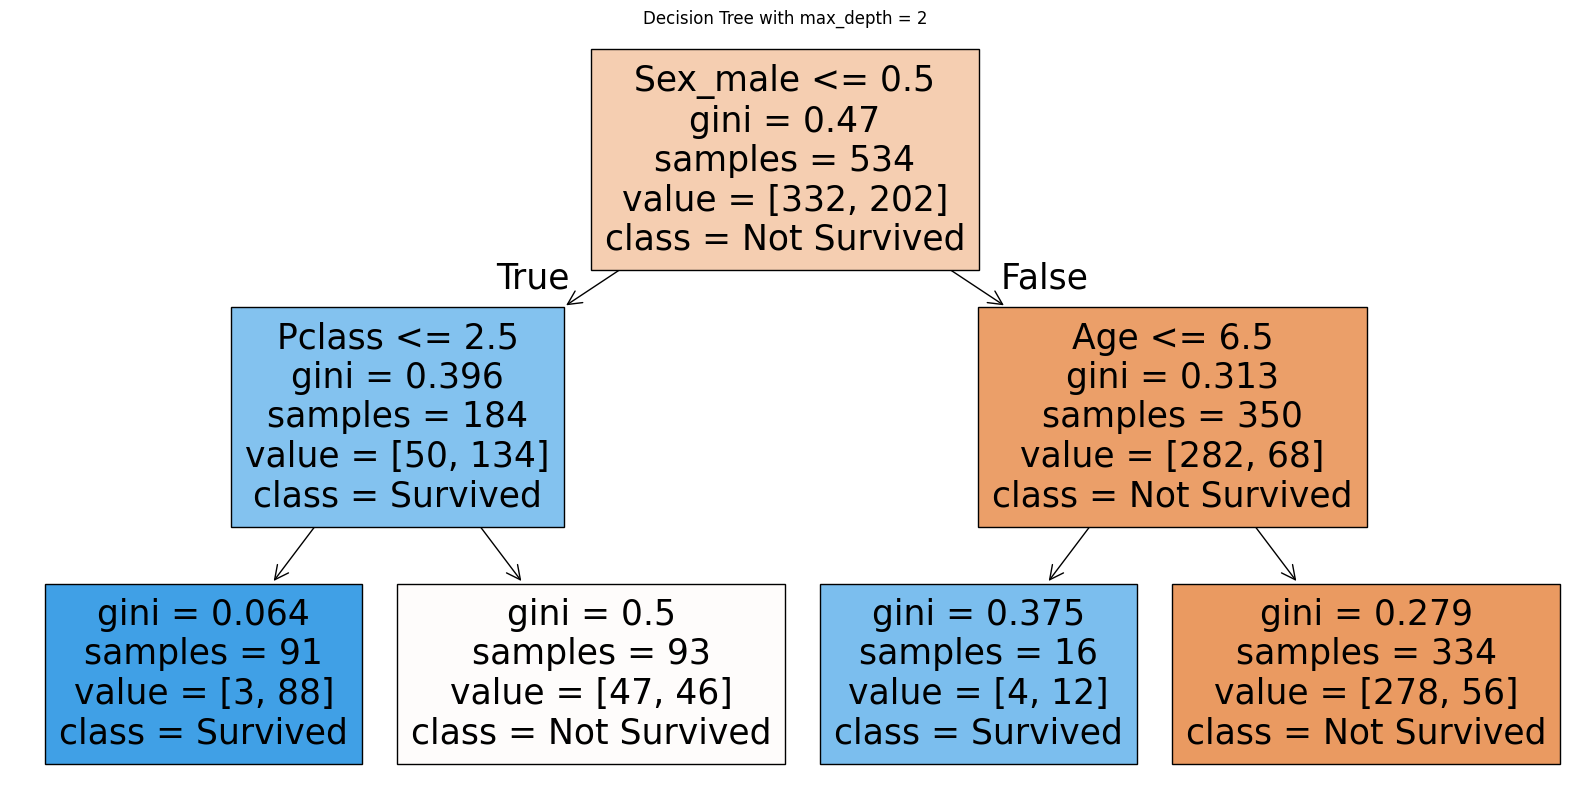

max_depth = 2 -> Training Accuracy: 0.796, Development Accuracy: 0.826


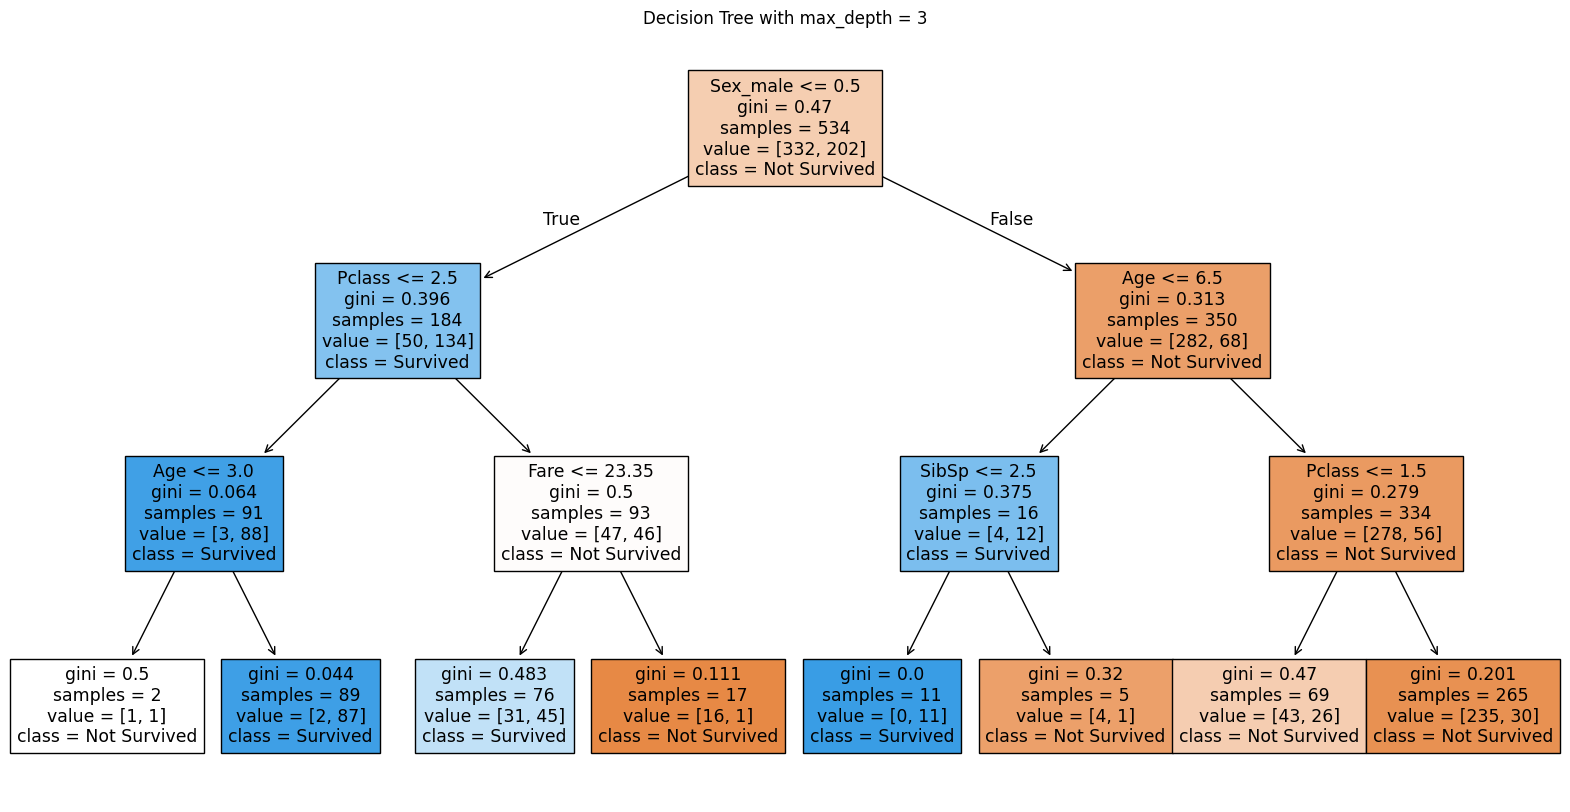

max_depth = 3 -> Training Accuracy: 0.828, Development Accuracy: 0.848


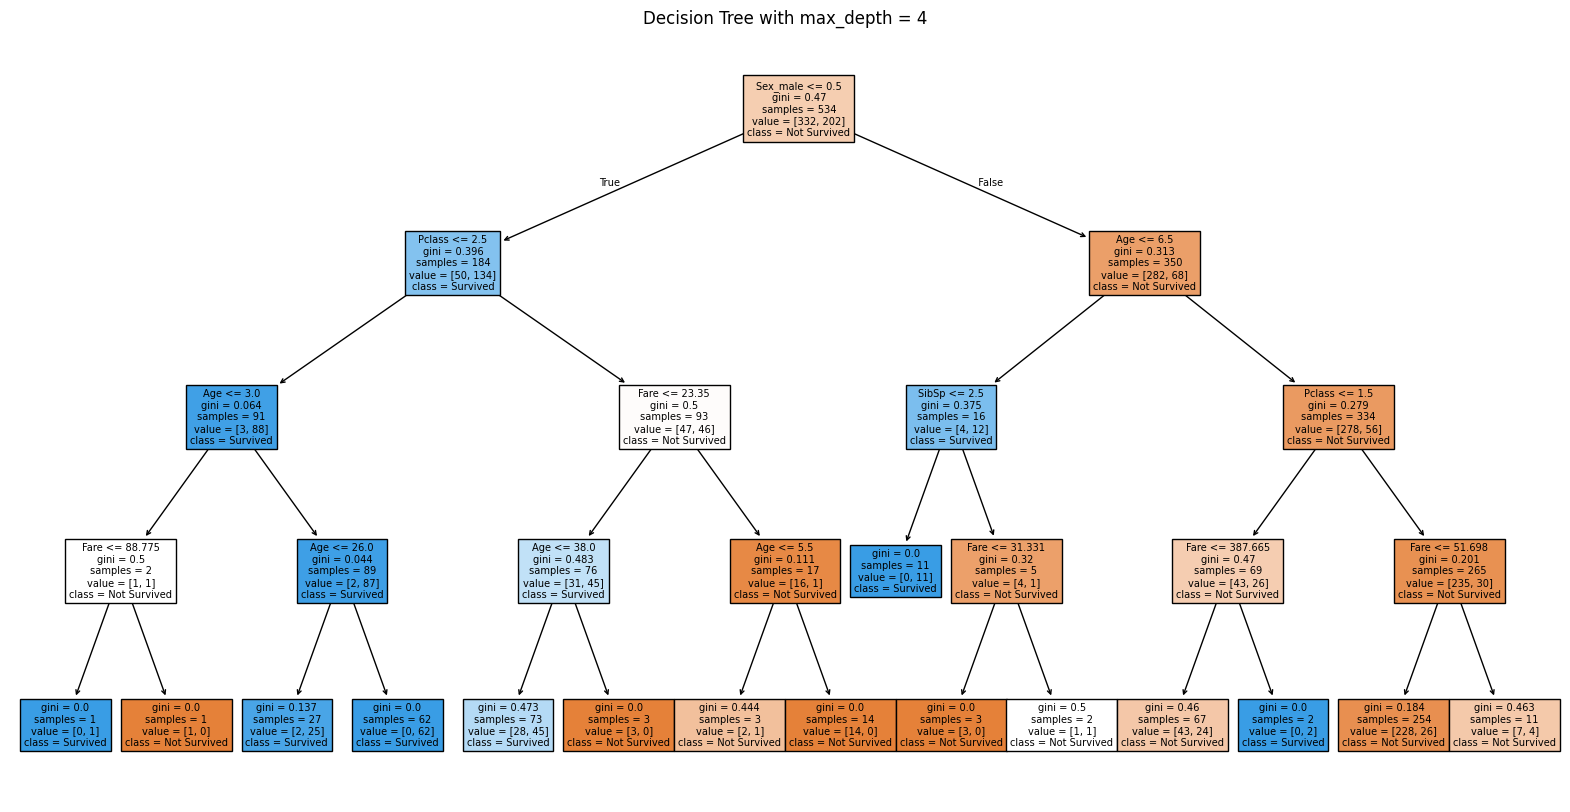

max_depth = 4 -> Training Accuracy: 0.839, Development Accuracy: 0.848


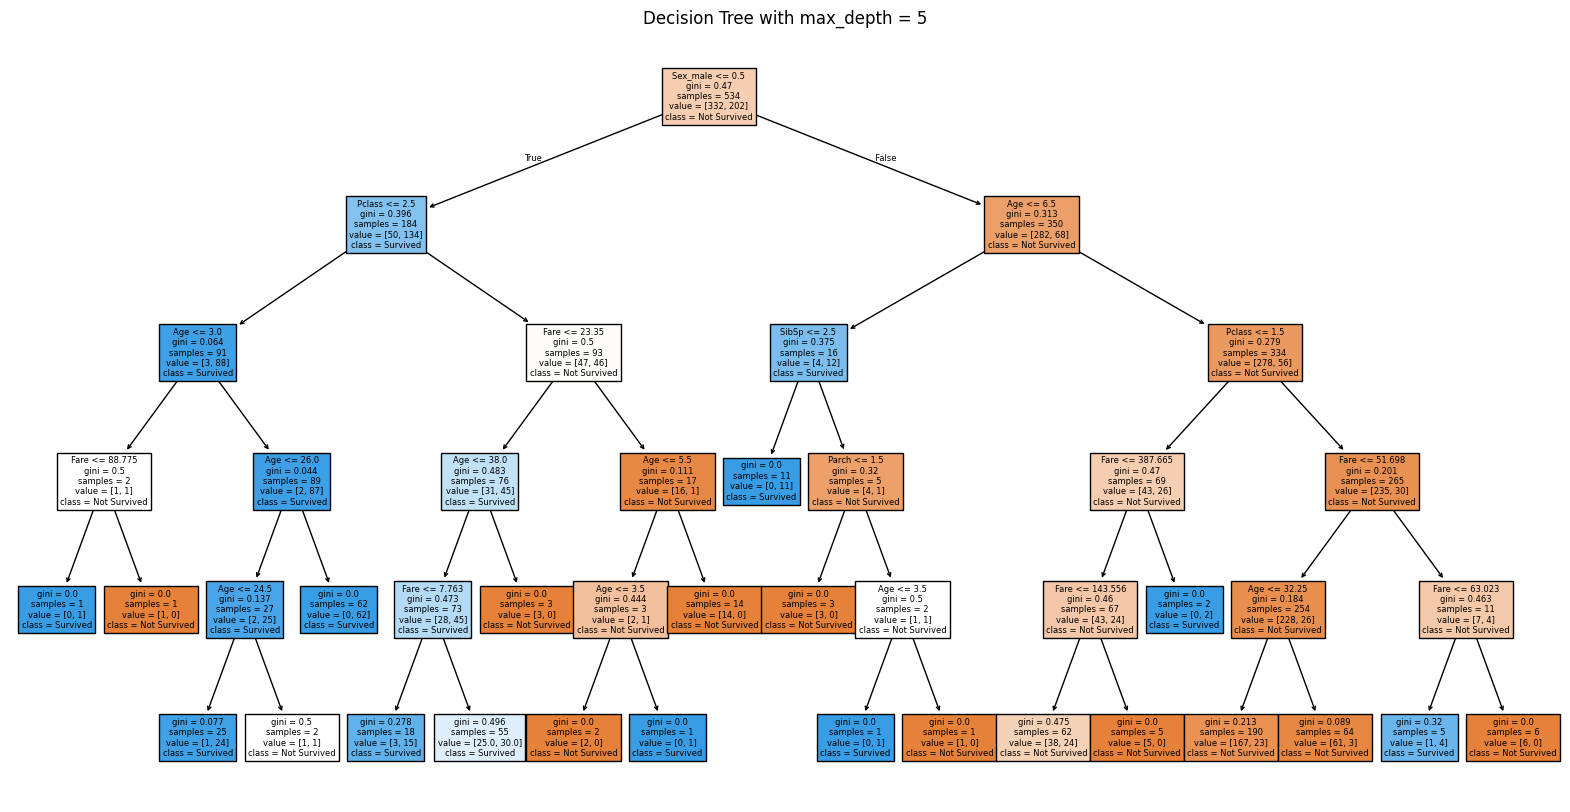

max_depth = 5 -> Training Accuracy: 0.848, Development Accuracy: 0.831


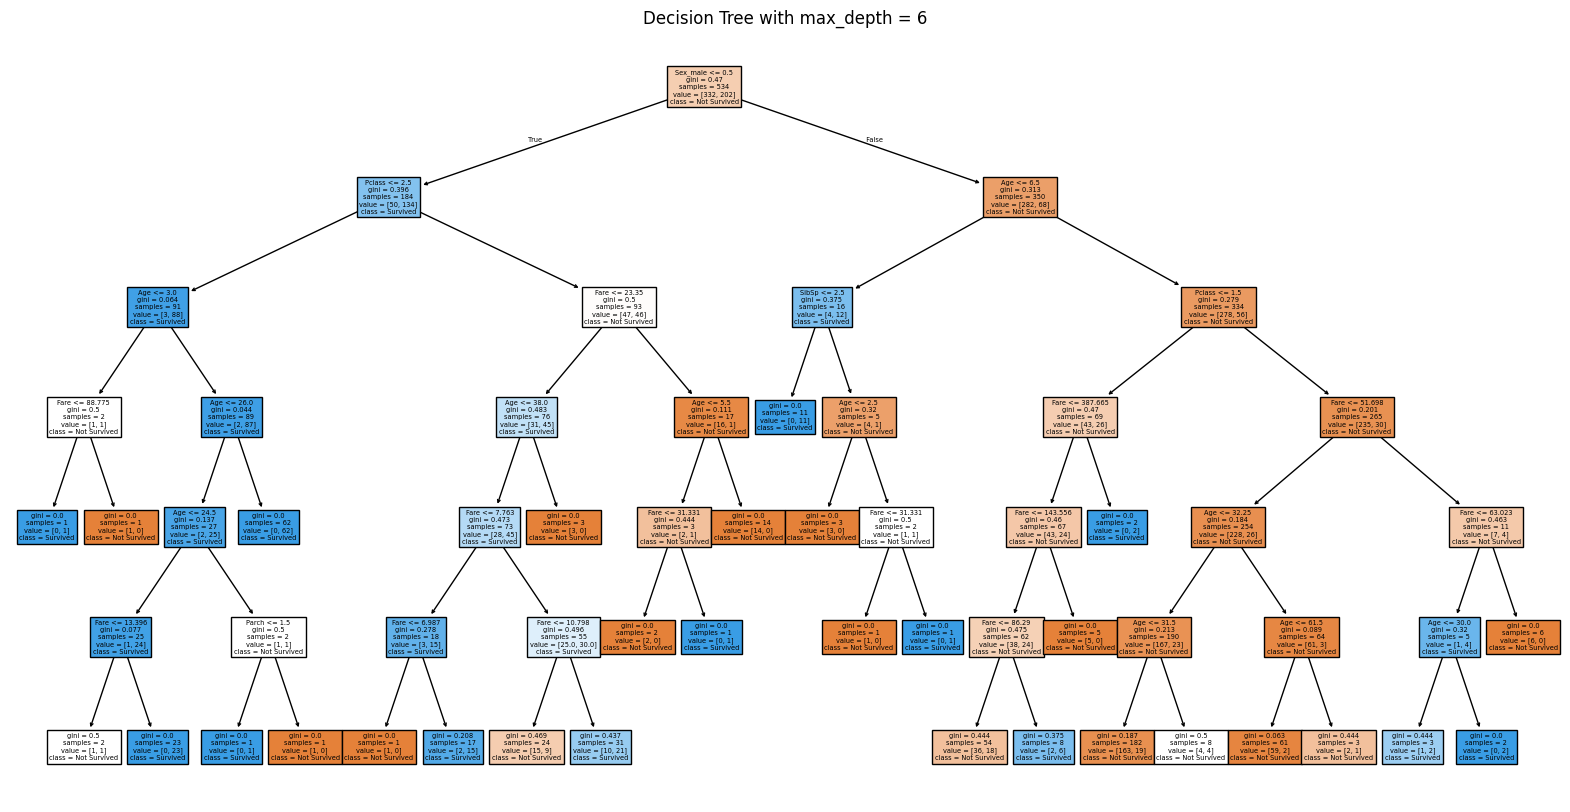

max_depth = 6 -> Training Accuracy: 0.871, Development Accuracy: 0.826


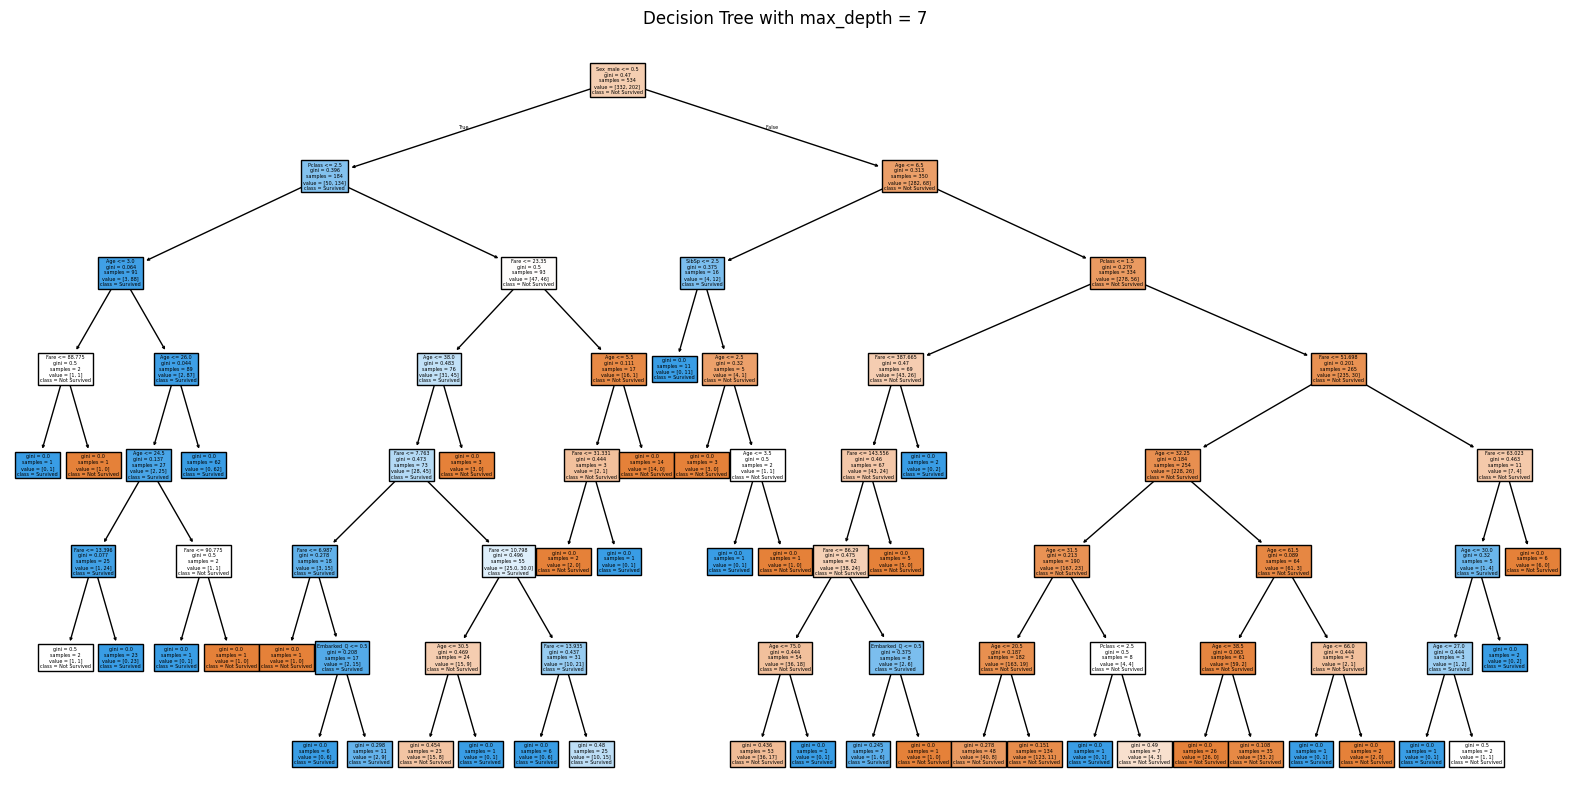

max_depth = 7 -> Training Accuracy: 0.880, Development Accuracy: 0.826


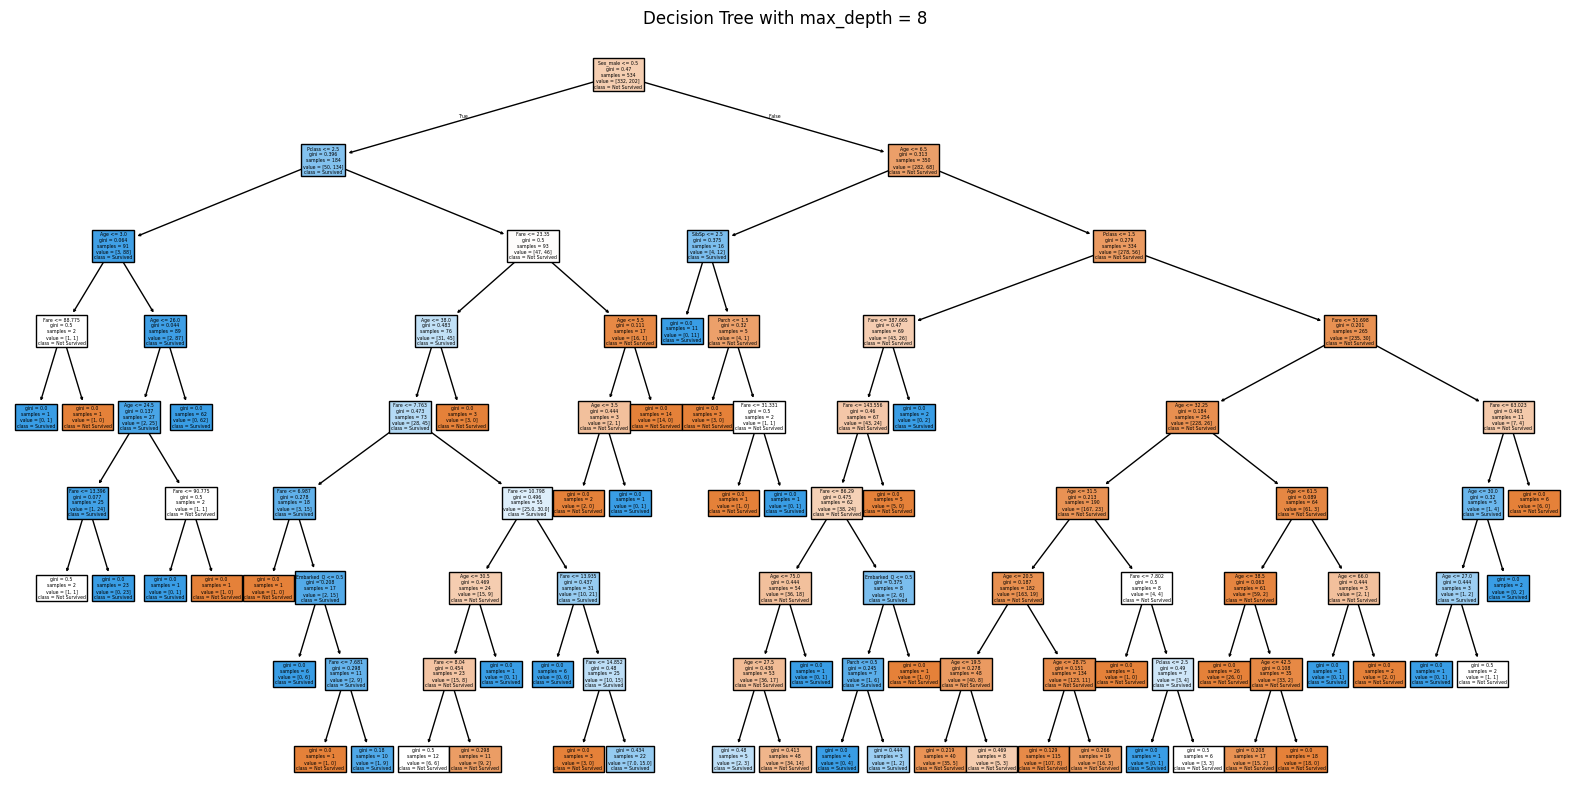

max_depth = 8 -> Training Accuracy: 0.890, Development Accuracy: 0.837


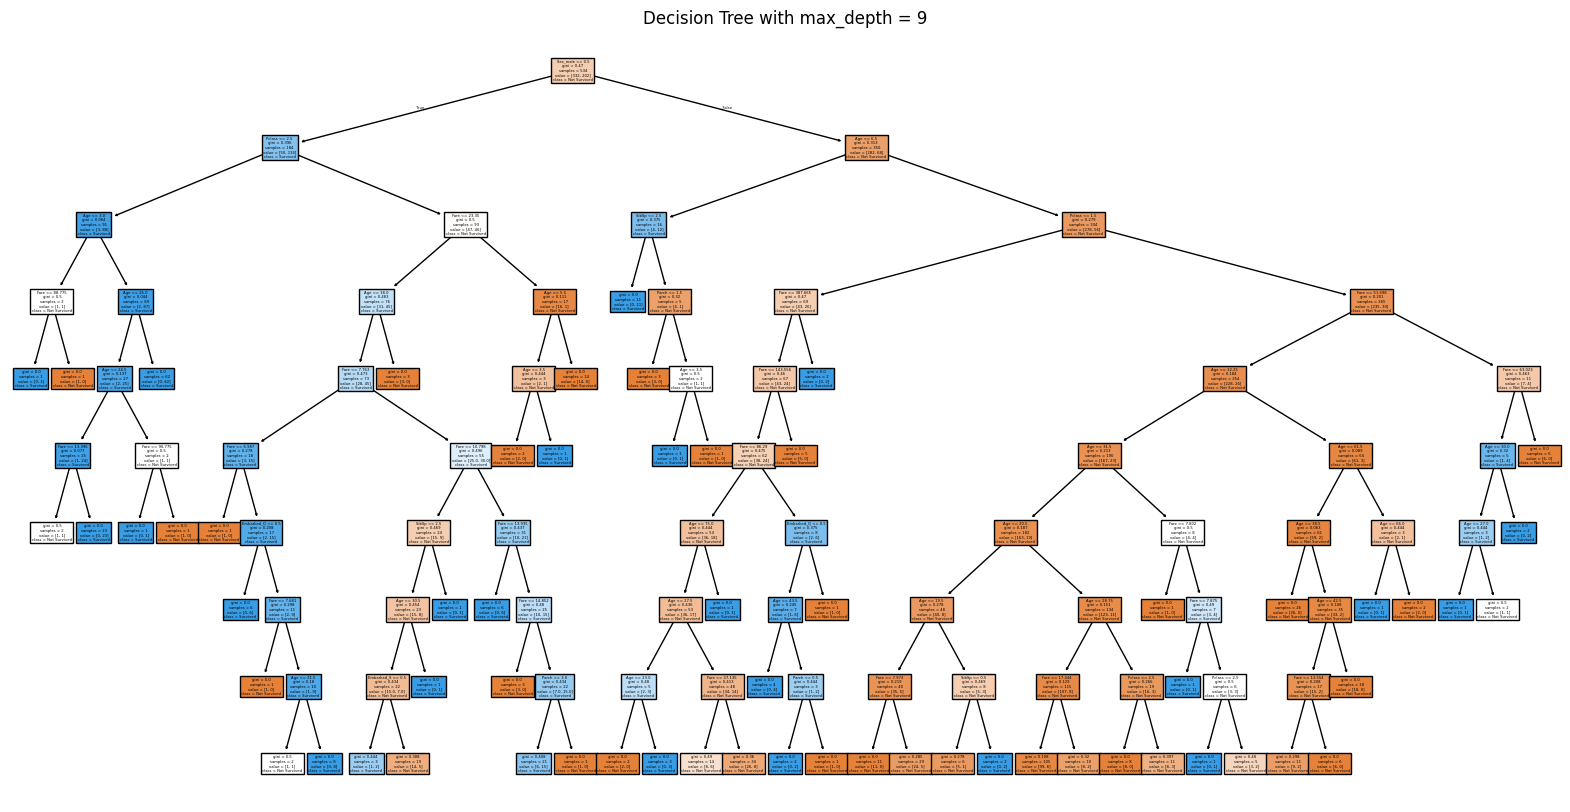

max_depth = 9 -> Training Accuracy: 0.906, Development Accuracy: 0.843


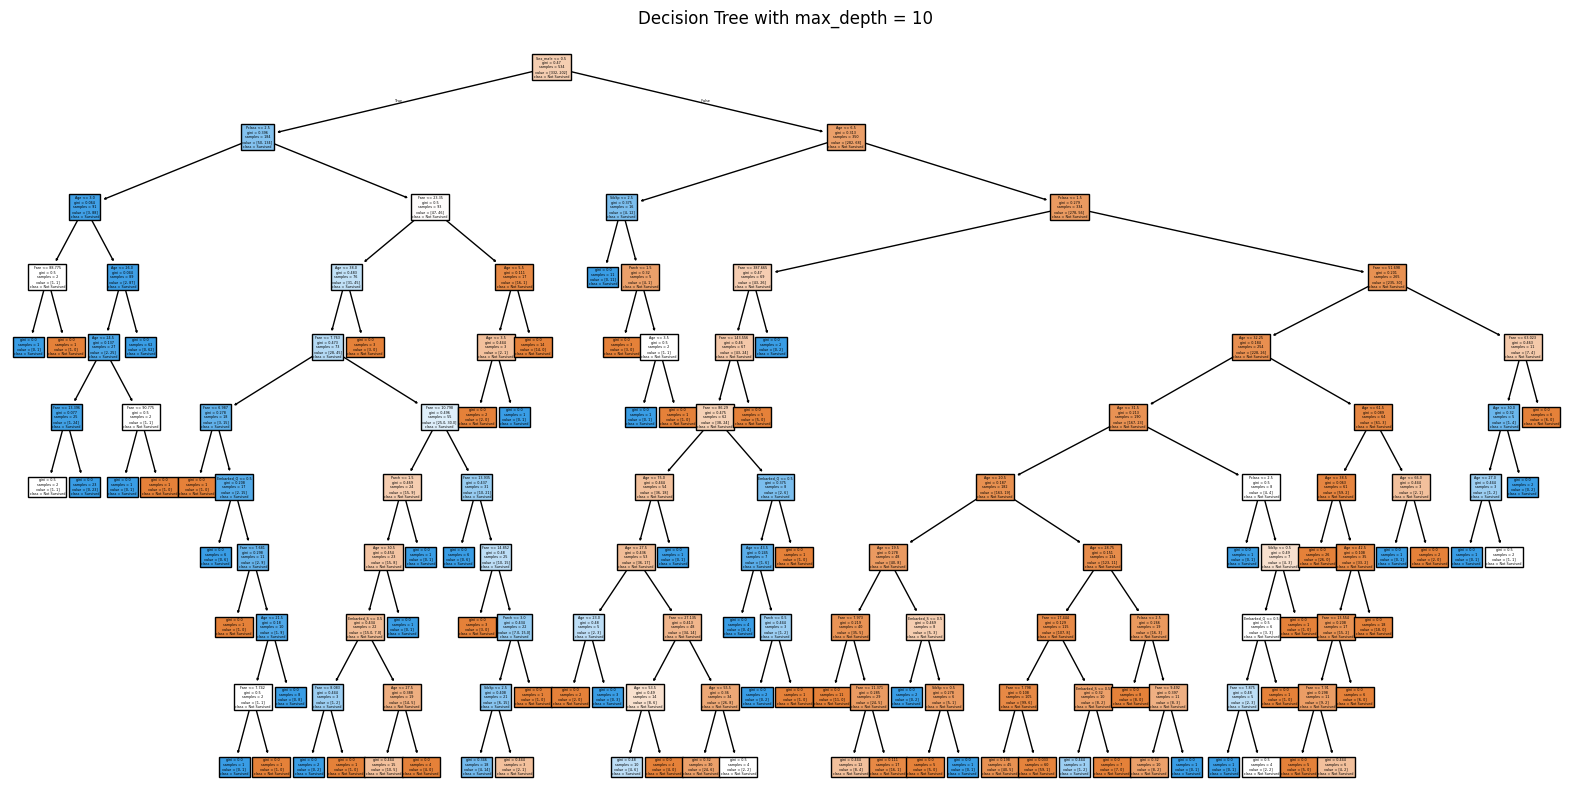

max_depth = 10 -> Training Accuracy: 0.921, Development Accuracy: 0.787


In [15]:
# 6. Train Decision Trees with max_depth values from 2 to 10

train_accuracies = []
dev_accuracies = []
max_depth_values = range(2, 11)

for depth in max_depth_values:
    # Create and train model with specified max_depth
    clf_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf_depth.fit(X_train, y_train)

    # Record training and development accuracies
    train_acc = clf_depth.score(X_train, y_train)
    dev_acc = clf_depth.score(X_dev, y_dev)
    train_accuracies.append(train_acc)
    dev_accuracies.append(dev_acc)

    # Visualize the decision tree for current max_depth
    plt.figure(figsize=(20,10))
    plot_tree(clf_depth, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
    plt.title(f"Decision Tree with max_depth = {depth}")
    plt.show()

In [16]:
print(f"max_depth = {depth} -> Training Accuracy: {train_acc:.3f}, Development Accuracy: {dev_acc:.3f}")

max_depth = 10 -> Training Accuracy: 0.921, Development Accuracy: 0.787


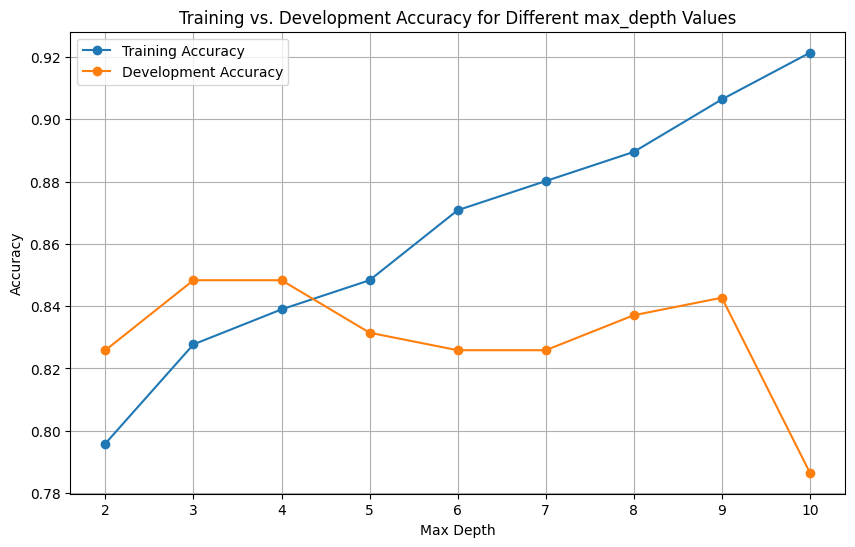

In [17]:
# 7. Plot Training vs. Development Accuracy for different max_depth values
plt.figure(figsize=(10,6))
plt.plot(max_depth_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(max_depth_values, dev_accuracies, marker='o', label='Development Accuracy')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Training vs. Development Accuracy for Different max_depth Values")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# 8. Analyze and Select the Optimal max_depth
# The optimal depth is the one that gives high development accuracy without overfitting.
optimal_depth = max_depth_values[dev_accuracies.index(max(dev_accuracies))]
print("Optimal max_depth selected:", optimal_depth)

Optimal max_depth selected: 3


In [19]:
# 9. Train Final Model with the Optimal max_depth and Evaluate on Test Set

final_model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
final_model.fit(X_train, y_train)
test_accuracy = final_model.score(X_test, y_test)
print("Final Model Test Set Accuracy:", test_accuracy)

Final Model Test Set Accuracy: 0.7988826815642458


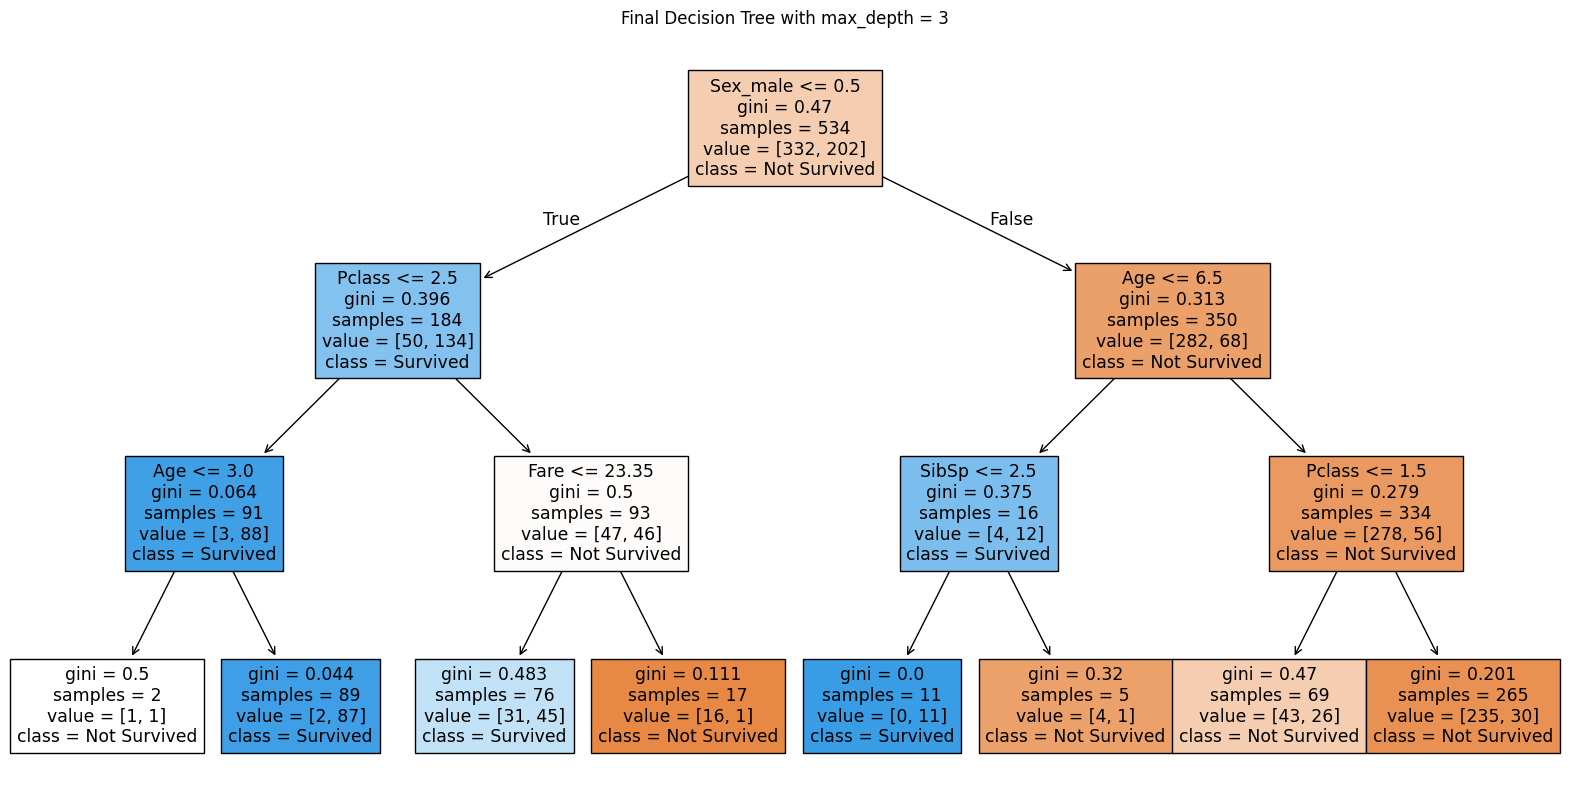

In [20]:
# Visualize the final decision tree
plt.figure(figsize=(20,10))
plot_tree(final_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title(f"Final Decision Tree with max_depth = {optimal_depth}")
plt.show()

### One-Hot Encoding
One-hot encoding is a technique used to transform categorical variables into a numerical format, making them suitable for machine learning algorithms. It works by creating new binary columns for each unique category in the original variable, where each column represents one possible category. This way, the categorical data is converted into a format that algorithms can easily process without assuming any inherent order or priority between the categories. For instance, in the 'Sex' column, which contains categories such as 'male' and 'female', one-hot encoding would generate two new columns, one for each category, with a binary value of 1 or 0 to indicate the presence of that category for each record.

Machine learning classifiers are unable to handle string values directly, so categorical data must be converted into a numerical form. There are two primary methods for doing this:

1. **Label Encoding**: This technique assigns a unique integer to each category, such as 0 for 'male' and 1 for 'female'. However, this approach introduces a problem—by using numbers, it suggests a ranking or order between the categories, which can confuse some machine learning models into thinking one category is inherently 'greater' than the other.

2. **One-Hot Encoding**: This method avoids the issue of implied order by creating separate binary columns for each category. For example, instead of assigning numbers to 'male' and 'female', one-hot encoding creates two new columns—`Sex_male` and `Sex_female`. If a person is `male`, there will be a 1 in the `Sex_male` column and a 0 in the `Sex_female` column, and vice versa for females. This method ensures each category is treated independently, without any implied hierarchy.

In pandas, a straightforward way to perform one-hot encoding is by using the `get_dummies()` function, which automatically generates these binary columns for categorical variables in your dataset.

Now, we do the same to the "Embarked" column.